# Housing price prediction 

Welcome to Machine Learning Housing Corporation! The first task you are asked to
perform is to build a model of housing prices in California using the California census
data. This data has metrics such as the population, median income, median housing
price, and so on for each block group in California. Block groups are the smallest
geographical unit for which the US Census Bureau publishes sample data (a block
group typically has a population of 600 to 3,000 people). We will just call them “districts”
for short.

### Importing all modules that we're gonna use

In [2]:
import pandas as pd
import  numpy as np
import scipy
import  matplotlib.pyplot as plt
import seaborn as sns



### importing the data set

In [4]:
# Importing

df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Checking if ocean_proximity is categorical or not

df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
# Getting a quick description for all numeric  columns in a table

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

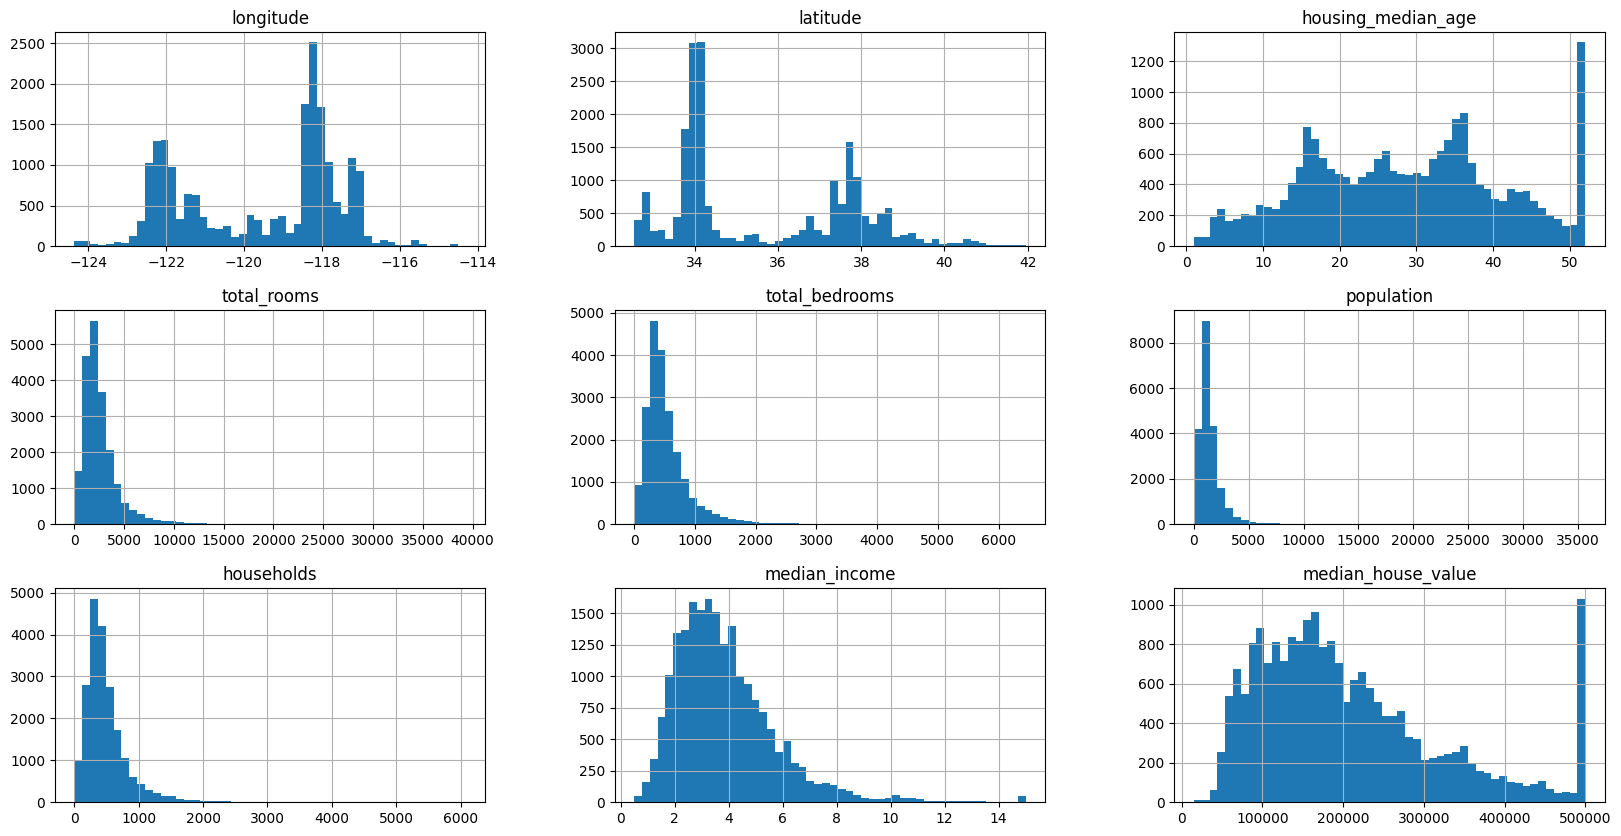

In [17]:
# Visualizing a hist plot for all numerical columns  in the dataset

df.hist(bins=50, figsize=(20, 10))

In [18]:
# Making a copy from the data set

df_copy = df.copy()

In [38]:
# Showing the correlation matrix for the data set

corr = df_copy.iloc[:,:-1].corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

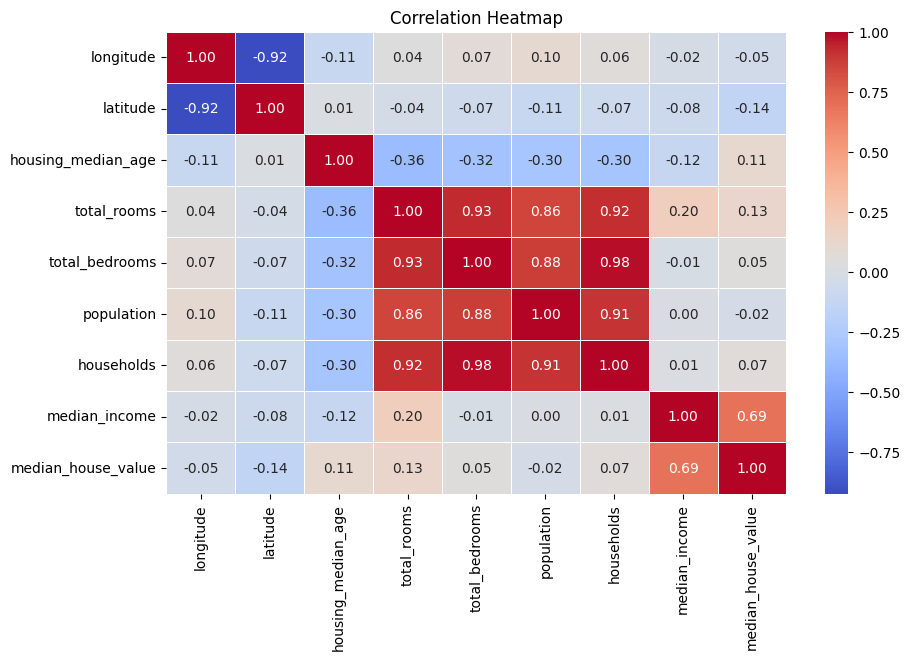

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

# Customize the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)

# Add a title
ax.set_title('Correlation Heatmap')


Text(0.5, 1.0, 'median_income distribution')

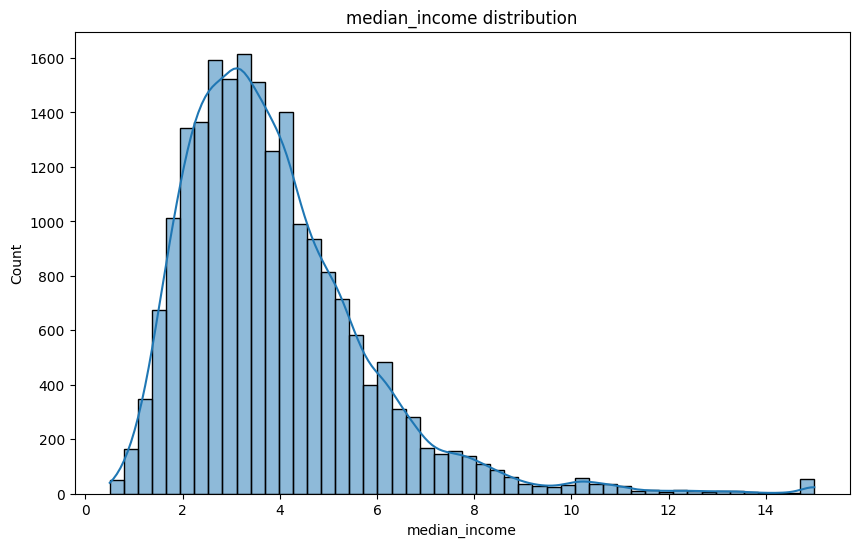

In [56]:
# Showing the median_income distribution

fig, ax = plt.subplots(figsize =(10, 6))
ax = sns.histplot(df_copy, x='median_income', bins=50, kde=True)
ax.set_title('median_income distribution')

Text(0, 0.5, 'count')

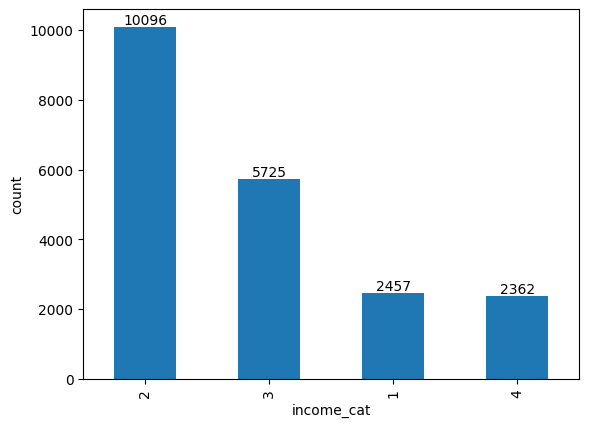

In [117]:
# now we're gonna split median_income  into 4 groups

df_copy['income_cat'] = pd.cut(df_copy['median_income'],
                                bins=[0, 2, 4, 6, np.inf],
                                 labels=[1, 2, 3, 4] )
ax = df_copy['income_cat'].value_counts().plot.bar()
ax.bar_label(ax.containers[0], fontsize=10)
plt.ylabel('count')

In [116]:
# Stratified Sampling to make the test data representative to avoid sampling bias
from sklearn.model_selection import StratifiedShuffleSplit

Splitting = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)

S = Splitting.split(df_copy, df_copy['income_cat'])

for train_index, test_index in S:
    train_set = df_copy.loc[train_index]
    test_set = df_copy.loc[test_index]

len(train_set), len(test_set)

(16512, 4128)

In [125]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


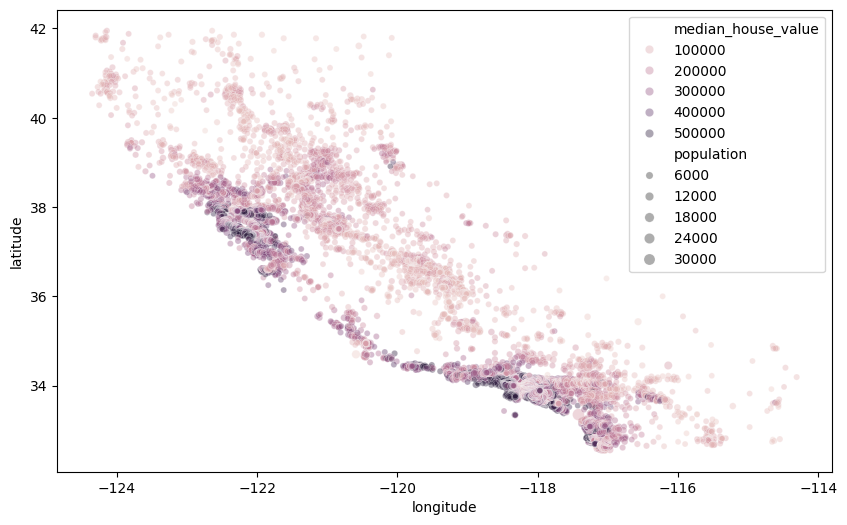

In [142]:
# Showing the distribution of the most place having houses
ax, fig = plt.subplots(figsize=(10, 6))
ax = sns.scatterplot(data= df, x='longitude', y='latitude', alpha = .4, hue = 'median_house_value', size='population')

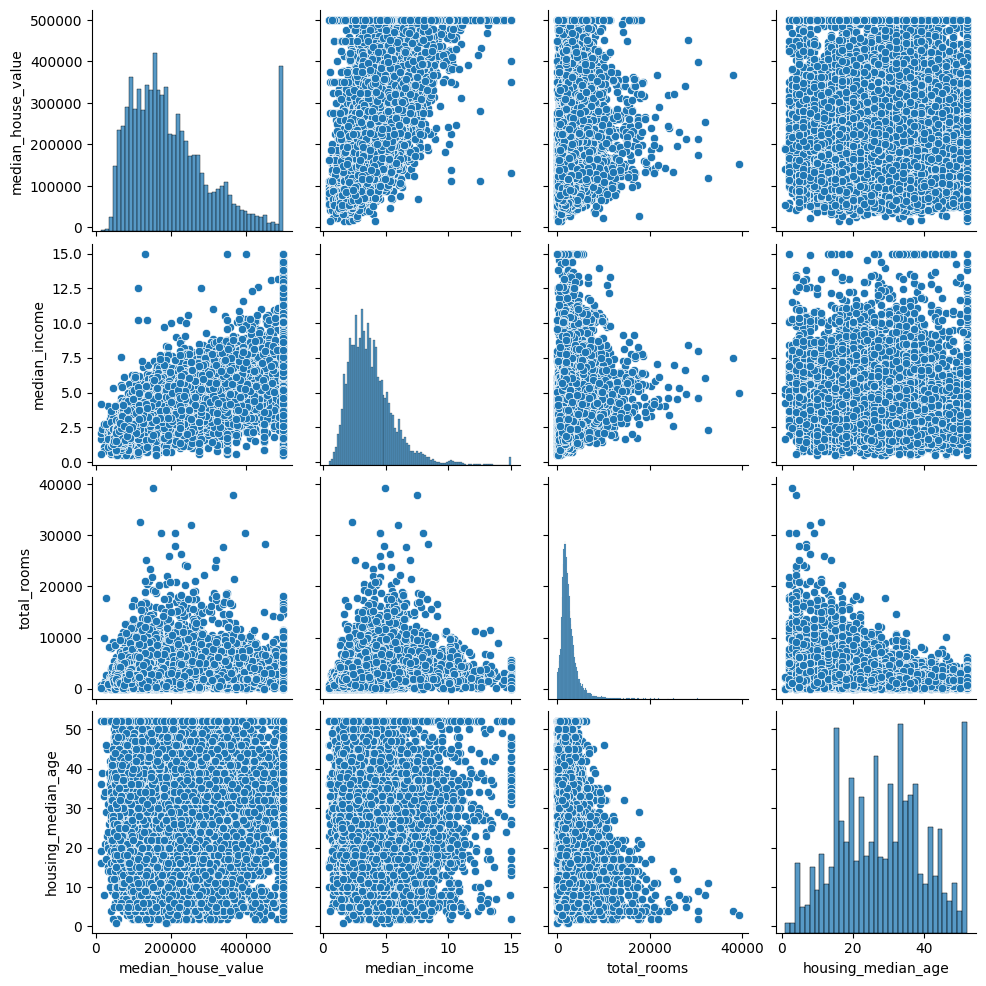

In [146]:
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
new_df = df_copy[attributes]
sns.pairplot(new_df)

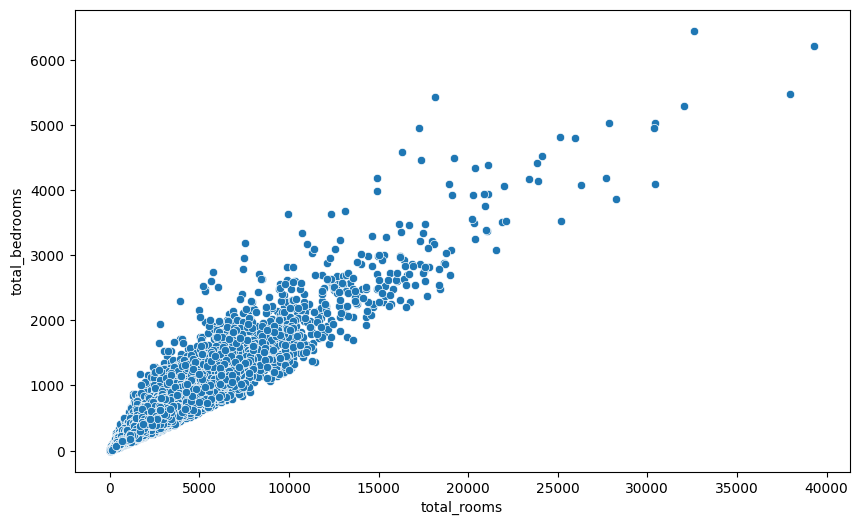

In [147]:
ax, fig = plt.subplots(figsize=(10, 6))
ax = sns.scatterplot(data= df_copy, x='total_rooms', y='total_bedrooms')

<Axes: xlabel='median_income'>

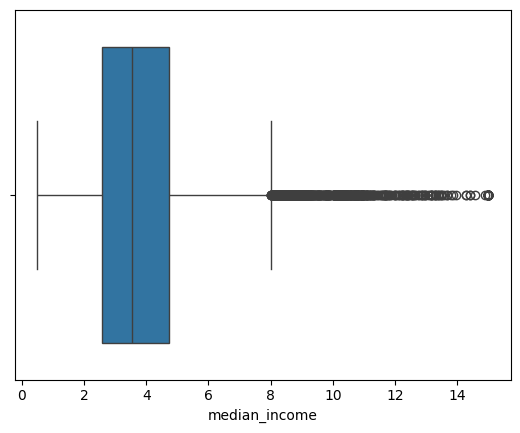

In [159]:
# Discovering outliers
 
sns.boxplot(df, x='median_income')

<Axes: xlabel='median_house_value'>

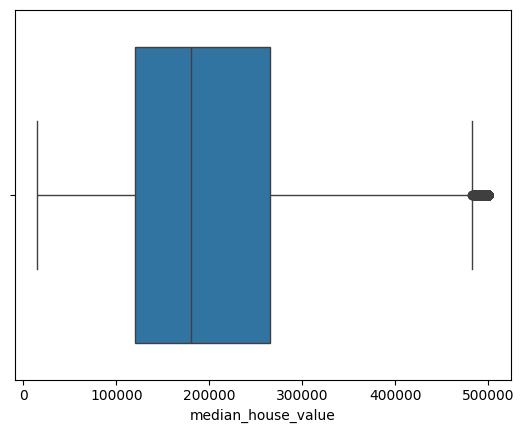

In [161]:
sns.boxplot(df, x='median_house_value')

<Axes: xlabel='median_house_value', ylabel='Count'>

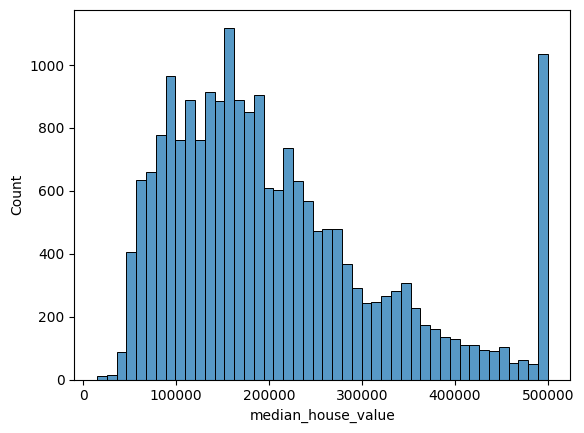

In [167]:
sns.histplot(df, x='median_house_value')